In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# load model
model = models.vgg16(pretrained=True)
model.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

--2022-03-16 14:09:42--  https://www.greatpetcare.com/wp-content/uploads/sites/2/2020/03/backyard-dangers-main.jpg
Resolving www.greatpetcare.com (www.greatpetcare.com)... 52.202.137.201, 54.165.53.59
Connecting to www.greatpetcare.com (www.greatpetcare.com)|52.202.137.201|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cdn-prd.content.metamorphosis.com/wp-content/uploads/sites/2/2020/03/backyard-dangers-main.jpg [following]
--2022-03-16 14:09:42--  https://cdn-prd.content.metamorphosis.com/wp-content/uploads/sites/2/2020/03/backyard-dangers-main.jpg
Resolving cdn-prd.content.metamorphosis.com (cdn-prd.content.metamorphosis.com)... 52.84.121.84, 52.84.121.113, 52.84.121.61, ...
Connecting to cdn-prd.content.metamorphosis.com (cdn-prd.content.metamorphosis.com)|52.84.121.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105430 (103K) [image/jpeg]
Saving to: ‘./dog.jpg’

./dog.jpg           100%[===============

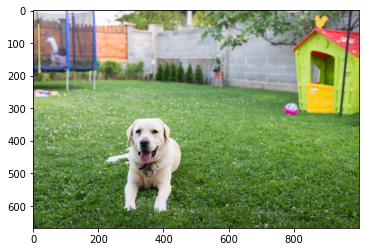

In [ ]:
# Download image
!wget -O ./dog.jpg https://www.greatpetcare.com/wp-content/uploads/sites/2/2020/03/backyard-dangers-main.jpg
dog = Image.open("dog.jpg")

plt.imshow(dog)

In [ ]:
# Pre-process image 
import torchvision.transforms as transform 

input_img_size = 224

image_transform = transform.Compose([transform.Resize((input_img_size,input_img_size)),
                                   transform.ToTensor(),
                                   transform.Normalize(mean=[0.485, 0.456, 0.406],
                                                        std=[0.229, 0.224, 0.225])])

img_tensor = image_transform(dog)
img_tensor = img_tensor.unsqueeze(0)
img_tensor = img_tensor.cuda()
img_tensor.requires_grad_(True)

tensor([[[[ 1.9920,  1.9749,  1.7180,  ...,  0.1939,  0.0569, -0.0458],
          [ 1.8550,  1.8722,  1.5468,  ...,  0.1768,  0.0227, -0.0458],
          [ 1.5468,  1.5297,  1.1015,  ...,  0.1939, -0.0458, -0.0629],
          ...,
          [-1.1418, -1.5185, -1.3302,  ..., -0.9192, -1.0562, -1.1075],
          [-1.4500, -1.6042, -1.3987,  ..., -0.7479, -1.0562, -1.3130],
          [-1.5357, -1.6042, -1.4158,  ..., -0.9363, -0.8164, -1.3130]],

         [[ 2.1835,  2.1660,  1.9034,  ...,  0.5203,  0.3452,  0.2402],
          [ 2.0434,  2.0609,  1.7283,  ...,  0.4853,  0.3452,  0.2927],
          [ 1.7108,  1.6933,  1.2556,  ...,  0.4853,  0.3803,  0.4328],
          ...,
          [-0.5301, -0.8978, -0.6877,  ..., -0.3200, -0.4076, -0.3375],
          [-0.9328, -1.0728, -0.8277,  ..., -0.1625, -0.4601, -0.6176],
          [-1.0903, -1.1429, -0.8803,  ..., -0.3550, -0.2150, -0.6702]],

         [[ 2.4831,  2.4657,  2.2043,  ...,  1.1062,  0.8971,  0.7228],
          [ 2.3437,  2.3611,  

In [ ]:
# Get gradients of the highest class activation in respect to the input image pixels

# 1. set eval mode for the model
model.eval()
# 2. get the predictions of the model on img_tensor
predictions = model(img_tensor)
# 3. select the highest class prediction value
max_prediction = predictions.max()
maximum_idx = predictions.argmax()
# 4. propagate back the gradients from this highest activation
max_prediction.backward()
# 5. save the gradients of the input image
image_gradients = img_tensor.grad
image_gradients = image_gradients.squeeze()
# 6. create a numpy matrix from the gradients
gradients = image_gradients.cpu().numpy()

print(maximum_idx)

# MISSING CODE

tensor(208, device='cuda:0')


In [ ]:
np.max(gradients)

0.5352981

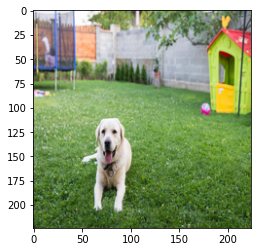

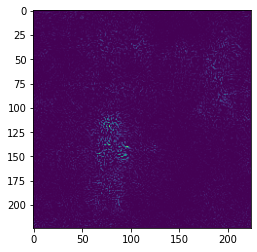

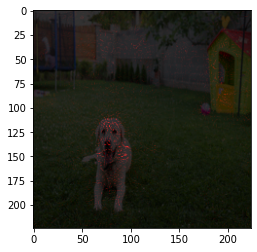

In [ ]:
# get saliency map based on gradients, and visualize it

# 1. transpose dimesnions from c,w,h to w,h,c
gradients = gradients.transpose(1,2,0)
# 2. sum the values along the channel dimension
gradients = np.sum(gradients, 2)
# 3. take only the positive weights
gradients[gradients<0]=0
# 4. scale the values to [0,255]
saliency_powered = 255/np.max(gradients)*gradients
# 5. convert the values to integer
saliency_powered = saliency_powered.astype(np.uint)

# MISSING CODE

# visualization of the saliency map
plt.imshow(dog.resize((input_img_size,input_img_size)))
plt.show()
plt.imshow(saliency_powered)
plt.show()

# overlaying the saliency map on the input image
saliency_image = np.zeros([input_img_size,input_img_size,3],dtype=np.uint8)
saliency_image[:,:,0] = saliency_powered
saliency_image[:,:,1] = 0
saliency_image[:,:,2] = 0

saliency_PIL = Image.fromarray(saliency_image)
result = Image.blend(dog.resize((input_img_size,input_img_size)),saliency_PIL, alpha=0.8)
plt.imshow(result)